# Real-world Data Wrangling

In [497]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [498]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


**Note:** Restart the kernel to use updated package(s).

In [499]:
import pandas as pd

## 1. Gather data

### **1.1.** Problem Statement

My goal is to examine Which genres has the highest average revenue and if it is in line with budget and rating a movie got. I'll be working with The Movies Dataset from Kaggle. These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

I will use 2 datasets:
1. 'movies_metadata.csv': The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.
2. ratings_small.csv: The subset of 100,000 ratings from 700 users on 9,000 movies.

Source: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data

### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**: movies_metadata.csv

Type: CSV File

Method: The data was gathered using the API fro Kaggle:https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

Dataset variables:

*   adult: "True" or "False"            
*   belongs_to_collection:  4494 non-null   object 
*   budget: The budget in which the movie was made 
*   genres: The genre of the movie 
*   homepage: The homepage of the movie 
*   id: Movie ID 
*   imdb_id: IMDB ID 
*   original_language: The original language of the movie
*   original_title: The original title of the movie 
*   overview: Description of the movie 
*   popularity: Numeric value specifying the movie popularity 
*   poster_path: Movie's poster eg: /jldsYflnId4tTWPx8es3uzsB1I8.jpg
*   production_companies: The production house of the movie 
*   production_countries: The country in which it was produced. 
*   release_date: The date on which movie was released 
*   revenue: The revenue generated by the movie
*   runtime: The running time of the movie in minutes
*   spoken_languages: eg :[{'iso_639_1': 'en', 'name': 'English'}]
*   status: "Released" or "Rumored" 
*   tagline: Movie's tagline 
*   title: Movie's title 
*   video: "True" or "False"
*   vote_average: average ratings of the movie
*   vote_count: the count of votes

Reason for Choosing: This dataset provides information about various aspects of movies, including  budget, genres, revenue, popularity, which for me seems important when analyzing factors influencing a movie's success.

In [500]:
!~/.local/bin/kaggle datasets download -d rounakbanik/the-movies-dataset -p ./movies --unzip

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 97%|███████████████████████████████████████▉ | 222M/228M [00:00<00:00, 254MB/s]
100%|█████████████████████████████████████████| 228M/228M [00:00<00:00, 248MB/s]


In [501]:
df = pd.read_csv("./movies/movies_metadata.csv")

/tmp/ipykernel_13/3248437407.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./movies/movies_metadata.csv")


#### Dataset 2: ratings_small.csv

Type: CSV File

Method: The data was gathered using the manual download from https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

Dataset variables:

*   userId: ID of a user
*   movieId: Movie ID
*   rating: rating a usere gave
*   timestamp: time the rating was saved

Reason for Choosing: This dataset enables to analyze ratings of a movie. I decided to use 

In [502]:
df_ratings = pd.read_csv("./movies/ratings_small.csv")

In [503]:
df_ratings.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [504]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [506]:
df.duplicated().sum()

13

Duplicated Data: there are 13 duplicated rows. I will remove them. 

### Quality Issue 2:

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [508]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Missing values. There are missing values in df dataset. I will investigate columns and decide if I can replace null values. Some columns seems not relevant for my analysis like homepage or poster_path, I will drop those columns. Some columns seems relevant for my analysis (runtime, revenue) and I will imput those missing vlaues. I will impute missing values after merging two datasets and dropping unnecessary columns as missing values may change.

### Tidiness Issue 1:

In [509]:
#check if there are multiple rows for movie id
df.id.count(), df.id.nunique()

(45466, 45436)

In [510]:
# check rows with duplicated movie's ids
dup_ids = df['id'][df.duplicated('id')]
df[df['id'].isin(dup_ids)].sort_values(by = 'id')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
676,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0
4114,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,143.0
5710,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,109962,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
20899,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,109962,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
23534,False,NaN,3512454,"[{'id': 18, 'name': 'Drama'}]",NaN,110428,tt2018086,fr,Camille Claudel 1915,"Winter, 1915. Confined by her family to an asy...",...,2013-03-13,115860.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Camille Claudel 1915,False,7.0,20.0
4356,False,NaN,3512454,"[{'id': 18, 'name': 'Drama'}]",NaN,110428,tt2018086,fr,Camille Claudel 1915,"Winter, 1915. Confined by her family to an asy...",...,2013-03-13,115860.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Camille Claudel 1915,False,7.0,20.0
24844,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,...,2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Deal,False,5.2,22.0
14012,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,...,2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Deal,False,5.2,22.0


There are rows which are not duplicated, but have the same movie id. I will keep one row for one movie id. I treat those entries as incorrect records. 

### Tidiness Issue 2: 

In [511]:
df.genres.unique()

array(["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
       ...,
       "[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, 'name': 'Action'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 28, 'name': 'Action'}, {'id': 9648, 'name': 'Mystery'}, {'id': 53, 'name': 'Thriller'}, {'id': 27, 'name': 'Horror'}]",
       "[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]"],
      dtype=object)

In [512]:
df.genres

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

Multiple Variables in one column: for simplicity I will take first genre from each array. 

In [513]:
# checking df_ratings
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [514]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [515]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [516]:
df_ratings.duplicated().sum()

0

In [517]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [518]:
df_ratings.rating.unique()

array([2.5, 3. , 2. , 4. , 3.5, 1. , 5. , 4.5, 1.5, 0.5])

In df_rating there are no missong or duplicated values. I will remove userId and timestamp clumns as I will not use them in my analysis

## 3. Clean data

In [519]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_orig = df
df_ratings_orig = df_ratings

### **Quality Issue 1: duplicated rows**

In [520]:
df.duplicated().sum()

13

In [521]:
# drop duplicated rows
df.drop_duplicates(keep='first', inplace=True)

In [522]:
# duplicated rows - Validate the cleaning was successful
df.duplicated().sum()

0

Justification: I remove duplicated rows as I treat them as incorrect entries. Duplicated rows may affect analysis and drive wrong conclusions.

### **Tidiness Issue 1: Multiple movie's id**

In [523]:
# check rows with duplicated movie's ids after removing duplicated rows
dup_ids = df['id'][df.duplicated('id')]
df[df['id'].isin(dup_ids)].sort_values(by = 'id')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0
4114,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,143.0
20899,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,109962,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
5710,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,109962,tt0082992,en,Rich and Famous,Two literary women compete for 20 years: one w...,...,1981-09-23,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"From the very beginning, they knew they'd be f...",Rich and Famous,False,4.9,7.0
4356,False,NaN,3512454,"[{'id': 18, 'name': 'Drama'}]",NaN,110428,tt2018086,fr,Camille Claudel 1915,"Winter, 1915. Confined by her family to an asy...",...,2013-03-13,115860.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Camille Claudel 1915,False,7.0,20.0
23534,False,NaN,3512454,"[{'id': 18, 'name': 'Drama'}]",NaN,110428,tt2018086,fr,Camille Claudel 1915,"Winter, 1915. Confined by her family to an asy...",...,2013-03-13,115860.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Camille Claudel 1915,False,7.0,20.0
5535,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0
44826,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0
15765,False,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",...,2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0
11342,False,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",...,2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0


In [524]:
# keep first row for duplicated movie's id
df.drop_duplicates('id', keep='first', inplace=True)

In [525]:
# check if there are no duplicated ids
df.duplicated('id').sum(), df.id.count(), df.id.nunique()

(0, 45436, 45436)

Justification: I removed rows with duplicated movie's id and kept first row. It simplifies dataset and helps to avoid driving incorrect conclusions from analysis. 

### **Remove unnecessary variables and combine datasets**

In [526]:
# Join tables using movie ID
# rename movieId  into id in df_ratings
df_ratings.rename(columns={"movieId": "id"}, inplace = True)

In [527]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   id         100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [528]:
# change df.id from object to str format
df['id'] = df['id'].astype(str)

In [529]:
# change df_ratings.id from int to str format
df_ratings['id'] = df_ratings['id'].astype(str)

In [530]:
#merge datasets
df = df.merge(df_ratings, how='inner', on='id')

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44989 entries, 0 to 44988
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  44989 non-null  object 
 1   belongs_to_collection  10793 non-null  object 
 2   budget                 44989 non-null  object 
 3   genres                 44989 non-null  object 
 4   homepage               10959 non-null  object 
 5   id                     44989 non-null  object 
 6   imdb_id                44989 non-null  object 
 7   original_language      44989 non-null  object 
 8   original_title         44989 non-null  object 
 9   overview               44852 non-null  object 
 10  popularity             44989 non-null  object 
 11  poster_path            44953 non-null  object 
 12  production_companies   44989 non-null  object 
 13  production_countries   44989 non-null  object 
 14  release_date           44960 non-null  object 
 15  re

In [532]:
df.shape

(44989, 27)

After joining two datasets there are 44989 rows and 27 columns in merged dataset. I will check missing values, drop unnecessary columns and prepart other cleaning steps on the merged dataset.

In [533]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'userId', 'rating', 'timestamp'],
      dtype='object')

In [534]:
# drop unnecessary columns from df table
df.drop(columns = ['adult', 'belongs_to_collection', 'homepage', 'imdb_id',
                  'original_language', 'original_title', 'overview',
                   'popularity', 'poster_path', 'production_companies',
                   'production_countries', 'release_date',
                   'spoken_languages', 'status', 'tagline', 'title', 'video','userId', 'timestamp'], axis = 1, inplace = True)

In [535]:
df.columns

Index(['budget', 'genres', 'id', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'rating'],
      dtype='object')

In [536]:
df.shape

(44989, 8)

After dropping columns dataset contains of 8 columns

Justification: I remove unnecessary columns from df table as I will not use them in my analysis. Dropping unnecessary columns simplifies dataset.

### **Quality Issue 2: missing values**

In [537]:
df.isna().sum()

budget          0
genres          0
id              0
revenue         0
runtime         4
vote_average    0
vote_count      0
rating          0
dtype: int64

After dropping unnecessary columns and duplicated rows there are 4 missing values in runtime column.

In [538]:
# check rows with missing runtime
df[df['runtime'].isna()]

,budget,genres,id,revenue,runtime,vote_average,vote_count,rating
39969,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",61361,0.0,NaN,8.0,2.0,3.0
42798,0,"[{'id': 18, 'name': 'Drama'}]",63276,0.0,NaN,6.4,9.0,3.5
42799,0,"[{'id': 18, 'name': 'Drama'}]",63276,0.0,NaN,6.4,9.0,4.0
44917,0,"[{'id': 35, 'name': 'Comedy'}]",63179,0.0,NaN,6.5,8.0,4.5


There are only 4 rows with missing runtime. I will replace runtime with average runtime among movies wit zero budget and zero revenue

In [539]:
# change budget format into float
df['budget'] = df['budget'].astype(float)

In [540]:
# select distinct movies with zero budget and zero revenue
df_subset = df[['id', 'budget', 'revenue', 'runtime']].loc[(df['budget'] == 0) & (df['revenue'] == 0) & (~df['runtime'].isna())]

In [541]:
df_subset = df_subset.drop_duplicates()

In [542]:
# calculate average runtime for movies with zero budget and zero revenue
avg_runtime = df_subset.runtime.mean()
avg_runtime

97.46292296616271

In [543]:
#replace missing runtime with avg_runtime value
df['runtime'] = df['runtime'].fillna(avg_runtime) 

In [544]:
# check if there are null values
df.isna().sum()

budget          0
genres          0
id              0
revenue         0
runtime         0
vote_average    0
vote_count      0
rating          0
dtype: int64

Justification: I replaced missing values in runtime with average runtime value within similar group of records. Replacing missing values enables further analysis.

### **Quality Issue 2: Inconsistent Data - Multiple Variables in One Column**

In [545]:
df.genres

0        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
1        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
2        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
3        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
                               ...                        
44984    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
44985    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
44986    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
44987    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
44988    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...
Name: genres, Length: 44989, dtype: object

In [546]:
# convert genres string into lists of dictionary objects
from ast import literal_eval

df['genres'] = df['genres'].apply(literal_eval)

In [547]:
# get first genre
def get_first(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        names = names[:1]
        
        return names

In [548]:
df['genres'] = df['genres'].apply(get_first)

In [549]:
df['genres']

0         [Action]
1         [Action]
2         [Action]
3         [Action]
4         [Action]
           ...    
44984    [Romance]
44985    [Romance]
44986    [Romance]
44987     [Comedy]
44988    [Fantasy]
Name: genres, Length: 44989, dtype: object

In [550]:
# remove [] brackets and convert to string
# df['column'] = 
df['genres'] = df['genres'].astype('str')

In [551]:
df['genres'] = df['genres'].map(lambda x: x.lstrip('[').rstrip(']'))

In [552]:
df['genres'] = df['genres'].map(lambda x: x.lstrip("''").rstrip("''"))

In [553]:
df.head(3)

,budget,genres,id,revenue,runtime,vote_average,vote_count,rating
0,60000000.0,Action,949,187436818.0,170.0,7.7,1886.0,3.5
1,60000000.0,Action,949,187436818.0,170.0,7.7,1886.0,4.0
2,60000000.0,Action,949,187436818.0,170.0,7.7,1886.0,2.0


In [554]:
df['genres'].unique()

array(['Action', 'Adventure', 'Drama', 'Crime', 'Comedy', 'Fantasy',
       'Science Fiction', 'Music', 'Horror', 'Documentary', 'Mystery',
       'Romance', 'Thriller', 'History', 'Animation', 'Family', 'Western',
       'TV Movie', '', 'War', 'Foreign'], dtype=object)

In [555]:
df.loc[(df['genres'] == '') ]

,budget,genres,id,revenue,runtime,vote_average,vote_count,rating
10139,0.0,,134368,0.0,90.0,3.0,3.0,4.5
10140,0.0,,134368,0.0,90.0,3.0,3.0,4.0
10141,0.0,,134368,0.0,90.0,3.0,3.0,3.0
10142,0.0,,134368,0.0,90.0,3.0,3.0,3.0
10143,0.0,,134368,0.0,90.0,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...
44345,0.0,,115877,0.0,85.0,5.0,1.0,3.5
44417,0.0,,130450,0.0,17.0,6.5,6.0,1.5
44570,0.0,,104863,0.0,12.0,6.7,3.0,3.5
44571,0.0,,104863,0.0,12.0,6.7,3.0,4.5


In [556]:
# replace '' genres with 'unknown'
df['genres'] = df['genres'].where(~df['genres'].isin(['']),'unknown')

In [557]:
df['genres'].unique()

array(['Action', 'Adventure', 'Drama', 'Crime', 'Comedy', 'Fantasy',
       'Science Fiction', 'Music', 'Horror', 'Documentary', 'Mystery',
       'Romance', 'Thriller', 'History', 'Animation', 'Family', 'Western',
       'TV Movie', 'unknown', 'War', 'Foreign'], dtype=object)

In [558]:
# displaying the datatypes
display(df.dtypes)

budget          float64
genres           object
id               object
revenue         float64
runtime         float64
vote_average    float64
vote_count      float64
rating          float64
dtype: object

Justification: I converted string of genres into dictionary and took first 'name' value. It simplifies dataset and enables to proceed analysis further.

## 4. Update data store

In [559]:
# Save the original datasets
df_orig.to_csv('orig_movies.csv', index=False)
df_ratings_orig.to_csv('orig_ratings.csv', index=False)

In [560]:
# Save the cleaned combined dataset
df.to_csv('cleaned_final_dataset.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 

*Research question:* Which genres has the highest average revenue? Is it in line with highest average budget and average rating?

In [561]:
# Calculate average revenue, budget and rating for each genre

In [562]:
df.genres.unique()

array(['Action', 'Adventure', 'Drama', 'Crime', 'Comedy', 'Fantasy',
       'Science Fiction', 'Music', 'Horror', 'Documentary', 'Mystery',
       'Romance', 'Thriller', 'History', 'Animation', 'Family', 'Western',
       'TV Movie', 'unknown', 'War', 'Foreign'], dtype=object)

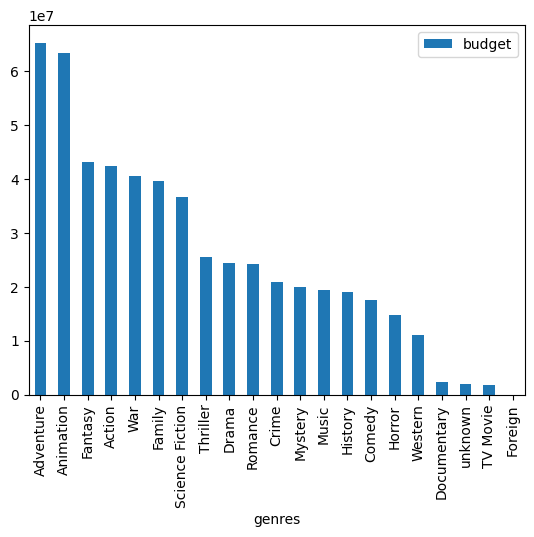

In [563]:
df_subset = df[['genres', 'budget']].drop_duplicates()
df_subset = df_subset.groupby('genres').mean(numeric_only=True).sort_values(by = 'budget', ascending = False)
df_subset.plot.bar();

*Answer to research question:* Adventure genre has the highest budget among all genres. The second one is the animation genre. Average budgets of those is significantly higher comparing to other genres. 

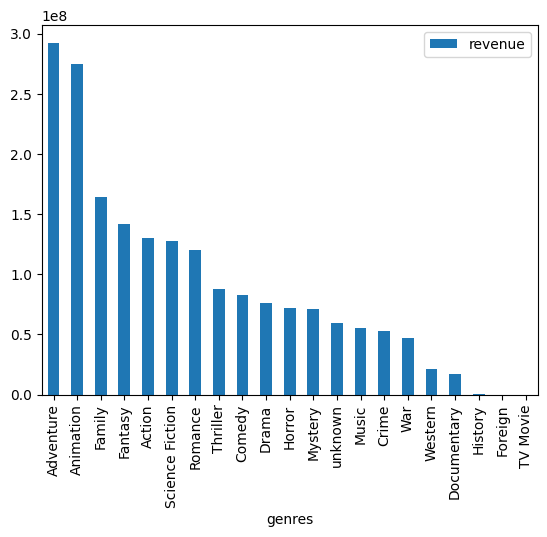

In [564]:
df_subset1 = df[['genres', 'revenue']].drop_duplicates()
df_subset1 = df_subset1.groupby('genres').mean(numeric_only=True).sort_values(by = 'revenue', ascending = False)
df_subset1.plot.bar();

*Answer to research question:* Considering top two highest average revenues conclusions are in line with highest average budgets. Top two highest average revenues are for adventure genreand animation genre. 

In [565]:
df_subset2.sort_values(by = 'rating')

,rating
genres,
History,3.375000
Music,3.391447
unknown,3.405941
Adventure,3.433578
Romance,3.443540
TV Movie,3.462838
Science Fiction,3.482584
Horror,3.498475
Crime,3.528635


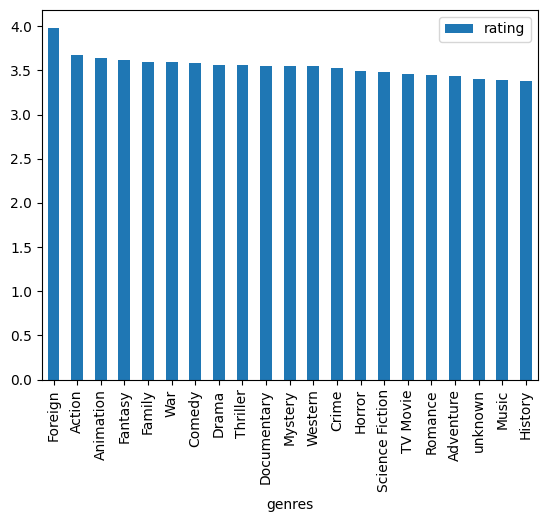

In [566]:
df_subset2 = df[['genres', 'rating']].groupby('genres').mean(numeric_only=True).sort_values(by = 'rating', ascending = False)
df_subset2.plot.bar();

*Answer to research question:* Highest average rating has 'Forein' genre. The second highest average rating has action genre. The third highest average rating has Animation genre. Adventure genre is on 18th place. User average ratings are not in line with average budget and average revenue.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete the project I would investigate what is foreign genre and what is better way to analyse genre. Interesting would be to check why some movies have zero budget and zero revenue. Perhas I should remove those from analysis. I would also combine credit dataset and analyse which factors influence ratings and revenue. 